pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.


In [1]:
import pandas as pd
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 分析train data

確認train data的數量與個特徵的分佈

In [9]:
df_train.shape

(891, 12)

In [14]:
df_train.describe()[1:]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
# 判斷null的數量
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 分析存活的可能"分類"特徵

In [28]:
# 分析train的存活比例
df_train.groupby('Survived').count()['Name']/df_train.shape[0]

Survived
0    0.616162
1    0.383838
Name: Name, dtype: float64

In [96]:
# 存活率根據分類型欄位的比例
def survive_ratio(col_name):
    col_list = df_train.groupby(col_name).count().index.tolist()
    for i in col_list:
        col_df = df_train[df_train[col_name]==i]
        result = col_df[[col_name,'Survived','Name']].groupby([col_name,'Survived']).count()/col_df.shape[0]
        print(result)

In [226]:
# 根據類別來分析存活率
def sur_plot(col_name):
    import matplotlib
    import matplotlib.pyplot as plt
    import numpy as np

    labels =  df_train.groupby(col_name).count().index.tolist()
    Dead_list = []
    Survival_list = []

    for i in labels:
        col_df = df_train[df_train[col_name] == i]
        result = col_df[[col_name,'Survived','Name']].groupby([col_name,'Survived']).count()/col_df.shape[0]
        Dead_list.append(round(result['Name'].tolist()[0], 2))
        Survival_list.append(round(result['Name'].tolist()[1], 2))
    
    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, Dead_list, width, label='Dead')
    rects2 = ax.bar(x + width/2, Survival_list, width, label='Survival')

    ax.set_ylabel('Survival Rate')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()

                     Name
Sex    Survived          
female 0         0.257962
       1         0.742038
                   Name
Sex  Survived          
male 0         0.811092
     1         0.188908


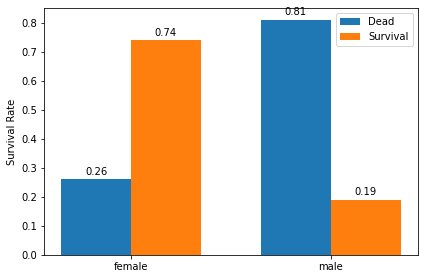

In [227]:
survive_ratio('Sex')
sur_plot('Sex')

* 以性別來看，女性的存活比較明顯高於男性，達到74.2％
* 男性存活比例相當低，僅18.89%

                    Name
Pclass Survived         
1      0         0.37037
       1         0.62963
                     Name
Pclass Survived          
2      0         0.527174
       1         0.472826
                     Name
Pclass Survived          
3      0         0.757637
       1         0.242363


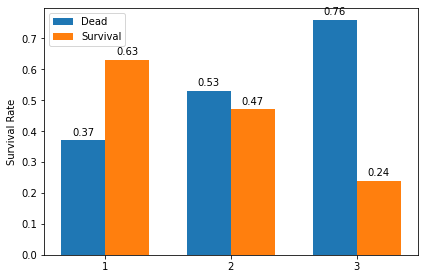

In [204]:
survive_ratio('Pclass')
sur_plot('Pclass')

* 頭等艙的存活率最高，達到62.9%
* 三等艙存活率最低，24.2%

                       Name
Embarked Survived          
C        0         0.446429
         1         0.553571
                      Name
Embarked Survived         
Q        0         0.61039
         1         0.38961
                       Name
Embarked Survived          
S        0         0.663043
         1         0.336957


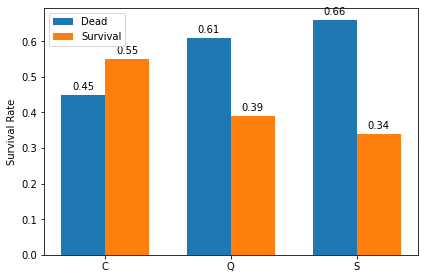

In [205]:
# 確認出發港口對於存活率的影響
survive_ratio('Embarked')
sur_plot('Embarked')

* C港口出航的人，相比Q、S有較高的存活率

In [113]:
# 確認一下每個艙等的性別比例
df_train.groupby(['Embarked','Pclass']).count()['Name']

Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         127
          2         164
          3         353
Name: Name, dtype: int64

C港口有較高的存活率合理，因為該港上船的多數為頭等艙的乘客

### 判斷存活的可能"數值"特徵
數值特徵主要有Age,SibSp,Parch,Fare

In [107]:
df_train.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [217]:
df_train.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [225]:
# 判斷Age跟存活率的關係
bins = [1, 20, 40, 60, 80]
df_train[['Survived','Age']].groupby([pd.cut(df_train.Age, bins),'Survived']).count()['Age']

Age       Survived
(1, 20]   0            95
          1            70
(20, 40]  0           232
          1           153
(40, 60]  0            78
          1            50
(60, 80]  0            17
          1             5
Name: Age, dtype: int64

In [ ]:
# 根據類別來分析存活率
def sur_plot_2(col_name):
    import matplotlib
    import matplotlib.pyplot as plt
    import numpy as np
    
    bins = 

    labels =  df_train.groupby(col_name).count().index.tolist()
    Dead_list = []
    Survival_list = []

    for i in labels:
        col_df = df_train[df_train[col_name] == i]
        result = col_df[[col_name,'Survived','Name']].groupby([col_name,'Survived']).count()/col_df.shape[0]
        Dead_list.append(round(result['Name'].tolist()[0], 2))
        Survival_list.append(round(result['Name'].tolist()[1], 2))
    
    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, Dead_list, width, label='Dead')
    rects2 = ax.bar(x + width/2, Survival_list, width, label='Survival')

    ax.set_ylabel('Survival Rate')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()

0      (20.0, 40.0]
1      (20.0, 40.0]
2      (20.0, 40.0]
3      (20.0, 40.0]
4      (20.0, 40.0]
           ...     
886    (20.0, 40.0]
887     (1.0, 20.0]
888             NaN
889    (20.0, 40.0]
890    (20.0, 40.0]
Name: Age, Length: 891, dtype: category
Categories (4, interval[int64]): [(1, 20] < (20, 40] < (40, 60] < (60, 80]]

In [13]:
df_train_sur = df_train[df_train['Survived']==1]
df_train_sur.describe()[1:]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
mean,444.368421,1.0,1.950292,28.343690,0.473684,0.464912,48.395408
std,252.358840,0.0,0.863321,14.950952,0.708688,0.771712,66.596998
min,2.000000,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,1.0,1.000000,19.000000,0.000000,0.000000,12.475000
50%,439.500000,1.0,2.000000,28.000000,0.000000,0.000000,26.000000
75%,651.500000,1.0,3.000000,36.000000,1.000000,1.000000,57.000000
max,890.000000,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


In [15]:
df_train_nosur = df_train[df_train['Survived']==0]
df_train_nosur.describe()[1:]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
mean,447.016393,0.0,2.531876,30.626179,0.553734,0.329690,22.117887
std,260.640469,0.0,0.735805,14.172110,1.288399,0.823166,31.388207
min,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,211.000000,0.0,2.000000,21.000000,0.000000,0.000000,7.854200
50%,455.000000,0.0,3.000000,28.000000,0.000000,0.000000,10.500000
75%,675.000000,0.0,3.000000,39.000000,1.000000,0.000000,26.000000
max,891.000000,0.0,3.000000,74.000000,8.000000,6.000000,263.000000
